<a href="https://colab.research.google.com/github/David-GHMM/ML-LAB4/blob/main/%D0%9C%D0%9E_%D0%9B%D0%A04_%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D1%80%D1%8F%D0%BD_%D0%9F%D0%98%D0%9D_231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 4
# Многомерная регрессия

**Цель работы:** изучение принципов решения задачи многомерной регрессии с использованием методов машинного обучения.

Набор данных включает следующие атрибуты:
* **Number** – индекс;
* **One** – 1;
* **Cattle** – крупный рогатый скот в тысячах голов;
* **Calves** – телята в тысячах голов;
* **Pigs** – свиньи в тысячах голов;
* **Lambs** – количество ягнят в тысячах голов;
* **Expenses** – расходы в тысячах долларов.

### 1. Импортируем библиотеки и загружаем данные

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('x19.csv', index_col='Number')
df.head()

,One,Cattle,Calves,Pigs,Lambs,Expenses
Number,,,,,,
1,1,3.437,5.791,3.268,10.649,27.698
2,1,12.801,4.558,5.751,14.375,57.634
3,1,6.136,6.223,15.175,2.811,47.172
4,1,11.685,3.212,0.639,0.964,49.295
5,1,5.733,3.220,0.534,2.052,24.115


### 2. Получим информацию о датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 1 to 19
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   One       19 non-null     int64  
 1   Cattle    19 non-null     float64
 2   Calves    19 non-null     float64
 3   Pigs      19 non-null     float64
 4   Lambs     19 non-null     float64
 5   Expenses  19 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.0 KB


### 3. Проверяем наличие пропущенных значений и выбросов

In [ ]:
# проверяем на пропущенные значения
print(df.isnull().sum())

One         0
Cattle      0
Calves      0
Pigs        0
Lambs       0
Expenses    0
dtype: int64


### 4. Исключаем невлияющие признаки

In [ ]:
df_copy = df.copy()

df_copy.drop("One", axis=1, inplace=True)

df_copy.head()

,Cattle,Calves,Pigs,Lambs,Expenses
Number,,,,,
1,3.437,5.791,3.268,10.649,27.698
2,12.801,4.558,5.751,14.375,57.634
3,6.136,6.223,15.175,2.811,47.172
4,11.685,3.212,0.639,0.964,49.295
5,5.733,3.220,0.534,2.052,24.115


### 5. Разделяем данные на признаки и целевую переменную

In [ ]:
y = df_copy['Expenses']
X = df_copy.drop('Expenses', axis=1)

In [ ]:
# убедимся, что данные в нужном нам формате
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
# посмотрим на признаки
X.head()

,Cattle,Calves,Pigs,Lambs
Number,,,,
1,3.437,5.791,3.268,10.649
2,12.801,4.558,5.751,14.375
3,6.136,6.223,15.175,2.811
4,11.685,3.212,0.639,0.964
5,5.733,3.220,0.534,2.052


### 6. Разделяем данные на обучающую и тестовую выборку
75% данных используется для обучения и 25% — для тестирования.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 7. Применяем операцию нормализации для численной устойчивости

In [ ]:
# импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

### 8. Масштабируем признаки обучающей выборки

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

# убедимся, что объект scaler запомнил значения среднего и СКО для каждого признака
scaler.mean_, scaler.scale_

(array([5.36228571, 3.96778571, 2.41642857, 3.79528571]),
 array([3.40459665, 2.0792005 , 3.72642615, 4.89327601]))

### 9. Обучаем модель линейной регрессии

In [ ]:
# импортируем класс для создания модели линейной регрессии
from sklearn.linear_model import LinearRegression

# применим масштабированные данные для обучения модели линейной регрессии
model = LinearRegression().fit(X_train_scaled, y_train)
model

LinearRegression()

### 10. Делаем прогноз на основе данных тестирования

In [ ]:
# преобразуем тестовые данные с использованием среднего и СКО, рассчитанных на обучающей выборке
# так тестовые данные не повляют на обучение модели, и мы избежим утечки данных
X_test_scaled = scaler.transform(X_test)

# сделаем прогноз на стандартизированных тестовых данных
y_pred = model.predict(X_test_scaled)
# выведем первые пять значений с помощью диапазона индексов
y_pred[:5]

array([29.33606427, 55.48117707, 10.16104853, 36.10049816, 66.33261129])

In [ ]:
# импортируем функцию корня среднеквадратической ошибки
from sklearn.metrics import root_mean_squared_error
# сравним тестовые и прогнозные значения
print('Root Mean Squared Error (RMSE):',
      root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 16.42279933864537


In [ ]:
# посмотрим на еще одну метрику - коэффициент детерминации R2
from sklearn.metrics import r2_score
print('R2:', np.round(r2_score(y_test, y_pred), 2))

R2: 0.72


In [ ]:
# оценим R-квадрат (метрика (score) по умолчанию для класса LinearRegression)
model.score(X_test_scaled, y_test)

0.715630891512524

### 11. Итоговое уравнение

In [ ]:
# Коэффициенты
print('Coefficients:', model.coef_)

Coefficients: [8.91440298 5.14427431 2.17592244 0.99273604]


In [ ]:
# Свободный член
print('Intercept:', model.intercept_)

Intercept: 30.45028571428571


### 12. Оценим влияние признаков на целевую переменну

In [ ]:
df.corr()

,One,Cattle,Calves,Pigs,Lambs,Expenses
One,NaN,NaN,NaN,NaN,NaN,NaN
Cattle,NaN,1.000000,0.412465,0.462243,0.396420,0.881652
Calves,NaN,0.412465,1.000000,0.422080,0.097011,0.498907
Pigs,NaN,0.462243,0.422080,1.000000,0.457408,0.649599
Lambs,NaN,0.396420,0.097011,0.457408,1.000000,0.661697
Expenses,NaN,0.881652,0.498907,0.649599,0.661697,1.000000


### 13. Визуализация результатов регрессии

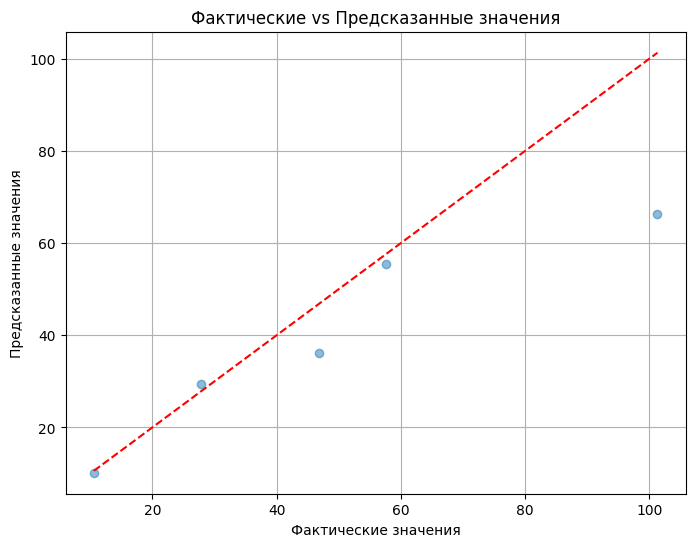

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5 )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.grid()
plt.show()

### 14. Остатки регрессии (Residuals Plot)

Остаток - это разница между фактическим и предсказанным значением (y_true - y_pred).

Этот график помогает проверить важное предположение линейной регрессии: что остатки случайны и не имеют паттернов.

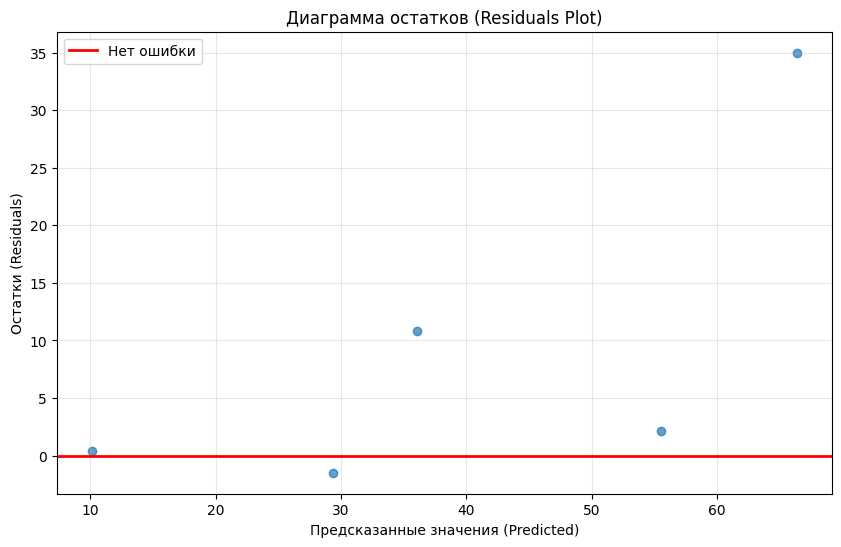

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='-', linewidth=2, label='Нет ошибки')
plt.xlabel('Предсказанные значения (Predicted)')
plt.ylabel('Остатки (Residuals)')
plt.title('Диаграмма остатков (Residuals Plot)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()